# Stats and Public Health Part 1

**Author: Darius Smith**

**BrainStation | Data Science | February 13, 2023**

## Dataset Information

This is a West Nile Virus (WNV) dataset from the City of Chicago. The city has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city to study the captured specimens and monitor the state of WNV spread in the city. The tracking data are from the years 2008 to 2019.

### 1. Data Dictionary  

Numerical Data:

- Year - Year that the WNV test is performed. (numerical)

- Week - Week that the WNV test is performed. (numerical)

- Date - Date and time that the WNV test is performed. 
(**Note - Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.**) (categorical)

Data About *Traps*: 

- Address Block - Address of the location of trap.(categorical)
- Trap - Id of the trap. 
(**Note - Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.**)(categorical)

- Trap type - Type of trap.(categorical)
- Mosquito # - Number of mosquitoes caught in this trap. 
(**Note - These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.**) (numerical)
- Block - Block number of address
- Latitude - Latitude of trap.(numerical)
- Longitude - Longitude of trap.(numerical)

Data About *Mosquitos*:

- Mosquito ID - Id for Mosquito species.(categorical)
- WNV Present - Whether West Nile Virus was present in these mosquitos.(categorical)
- Species - Mosquito species.(categorical)

Questions of Interest: 

- What is the relationship between mosquito number and date?
- What is the relationship between mosquito species and WNV prevalence? 
- What is the relationship between number of mosquitos caught and trap type?
- What is the relationship between block number mosquito traps?

In [11]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#importing the data being viewed and viewing the first 5 rows. 
mosquito_df = pd.read_csv("mosquito_data.csv") 
mosquito_df.head(5)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [13]:
#viewing the last 5 rows
mosquito_df.tail(5)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
18494,2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN


### 1.2 Initial Observations

- There are NaN values only in the 'Latitude' and 'Longitude' columns.
- Both 'Year','Week', and 'Date' are not in any kind of ascending or descending order in the last (5) rows. Data could   be unorganized. 
- WNV is labeled either negative or positive. 
- 'Mosquito ID' and 'Species' seems to have the same data in them. -  (species of mosquito) 
- 'Year' and 'Date' also seems to have the same data in them. - (year)
- 'Block' only has a number.
- 'Week' has data that is only between weeks (30 - 39).
- There seems to be similar data between 'Trap' and 'Trap type.'

### 1.3 Data Preparation Plan

#### Priority 1:

- Determine the shape of the data frame.(**Complete**)
- Convert the 'Date' column to have a datatime format.(**Complete**) 
- Pick (2) numerical & (2) categorical columns and determine what data they are storing and distribution.(**Complete**)
- Check for duplicates and remove them.(**Complete**)
- Deal appropoiately with Null values.(**Complete**)

#### Priority 2:

- Explore the relationship between 'Mosquito Number' and 'Date' using a visual. (**Complete**)
- Explore the relationship between 'Mosquito Species' and 'WNV'prevalence using a visual. (**Complete**)
- Explore the relationship between 'Number of Mosquitos caught' and 'Trap type' using a visual. (**Complete**)

#### Priority 3: 

- Determine how many mosquitos are positive versus negative with 'WNV.'(**Complete**)
- Gain an insight on Block number. (**Complete**)

In [372]:
#learning about the data frame. 
#there are (3) datatypes: (2) float64's, (4) int64's, and (7) objects/strings.
#there are (13) columns and (18,495) rows. This our shape, but will double check using .shape.
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             17837 non-null  int64  
 1   Week             17837 non-null  int64  
 2   Address Block    17837 non-null  object 
 3   Block            17837 non-null  int64  
 4   Trap             17837 non-null  object 
 5   Trap type        17837 non-null  object 
 6   Date             17837 non-null  object 
 7   Mosquito number  17837 non-null  int64  
 8   Mosquito ID      17837 non-null  object 
 9   WNV Present      17837 non-null  object 
 10  Species          17837 non-null  object 
 11  Lat              17837 non-null  float64
 12  Lon              17837 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.4+ MB


In [69]:
#reconfirming the shape. 
mosquito_df.shape

(18495, 13)

In [25]:
# Converting 'Date' column to datatime format
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date'])

In [26]:
# Confirming if datetime has been converted. 
#'Date' is now in datetime format.  
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


### 1.4 Understanding Data 

Looking at the (numerical columns) of 'Year' and 'Week' as well the (categorical columns) of 'Species' and 'WNV' Present.

**The Objective** - 

- Gain insights on how the data is distributed and what information they are telling.
- Gain an understanding of any patterns or trends that may be occuring. 
- Starting with the numerical first and then digging into the categorical. 

- 'Year'- (Year that the WNV test is performed.)
- 'Week'- (Week that the WNV test is performed.)
- 'Species'- (Mosquito species.)
- 'WNV' Present - (Whether West Nile Virus was present in these mosquitos.)

In [111]:
#Gaining information on the columnn. 
mosquito_df['Year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
18490    2016
18491    2007
18492    2016
18493    2017
18494    2015
Name: Year, Length: 18495, dtype: int64

In [112]:
#Gaining information on how many tests were performed in the 'Year.'
#Tests performed are in descending order from year.
mosquito_df['Year'].value_counts() 

2007    2141
2014    2000
2016    1844
2013    1624
2010    1397
2012    1392
2018    1361
2019    1209
2015    1178
2009    1135
2011    1120
2017    1110
2008     984
Name: Year, dtype: int64

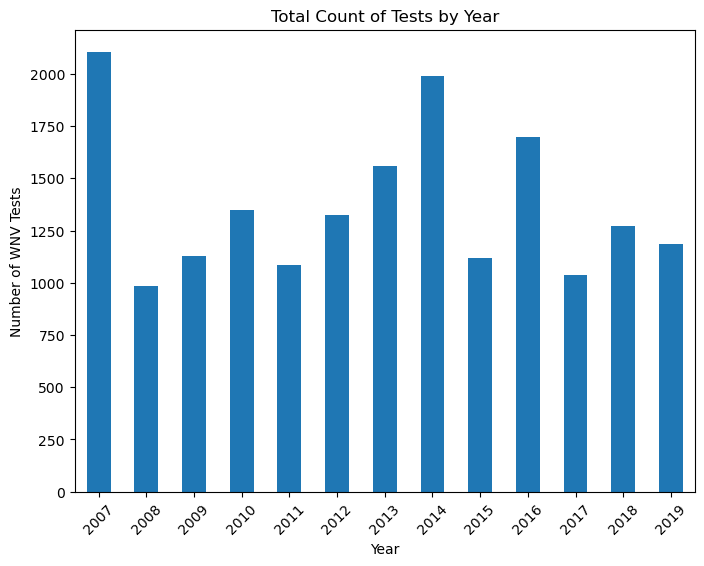

In [320]:
#Plotting a visualization for representation. 
plt.figure()
mosquito_df['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of WNV Tests')
plt.title('Total Count of Tests by Year')
plt.xticks(rotation=45)
plt.show()

### 1.5 Year, Week, Species, and WNV Present Insights

### 'Year' Insights:

- 2007 saw the most number of WNV Tests peformed with total count being (2141)
- 2008 saw the least amount of WNV tests performed with a total count of (841)
- 2007 to 2008 was a drastic decrease of WNV tests performed. 
- 2014 was the second highest count of WNV tests performed. 
- Data seems to be normally distributed. 
- The (3) highest peaks of tests performed are 2007, 2014, and 2016.

In [48]:
#Gaining information on the columnn. 
mosquito_df['Week']

0        39
1        39
2        39
3        39
4        39
         ..
18490    36
18491    34
18492    30
18493    33
18494    33
Name: Week, Length: 18495, dtype: int64

In [47]:
#Gaining information on how many tests were performed in the 'Week.'
#Tests performed are in descending order from week.
mosquito_df['Week'].value_counts()

32    1662
31    1596
33    1595
30    1442
34    1300
29    1277
28    1223
35    1113
36     972
27     946
37     840
24     802
26     792
25     791
38     664
23     603
39     594
22     129
21      78
40      47
20      29
Name: Week, dtype: int64

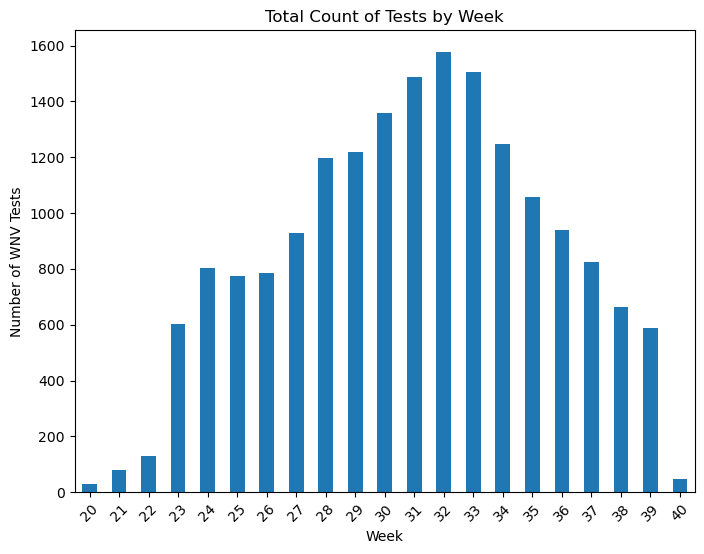

In [319]:
#Plotting a visualization for representation.
plt.figure()
mosquito_df['Week'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Week')
plt.ylabel('Number of WNV Tests')
plt.title('Total Count of Tests by Week')
plt.xticks(rotation=45)
plt.show()

### 'Week' Insights: 

- Week 32 had the highest number of WNV tests. (1662)
- Week 20 had the lowest number of tests (29), with week 40 being second(40)
- When looking at the month the weeks fall on, there seems to be correlation between tests performed and weather. 
- Week 32 takes place around August 15 when it is seasonally warm in Chicago and is summer. 
- Week 20 takes place around May 15th when the weather is warming but it is not quite summer. 
- Week 40 takes place around Oct 1st when the weather is becoming colder around the fall/winter season. 
- More tests are performed in the summer months vs. other seasonal months. 
- Data seems to be normally distributed. 

In [ ]:
mosquito_df['Week'].value_counts().plot(kind='bar'

In [76]:
#Gaining information on the columnn.
mosquito_df['Species']

0        CULEX RESTUANS
1        CULEX RESTUANS
2        CULEX RESTUANS
3        CULEX RESTUANS
4        CULEX RESTUANS
              ...      
18490     CULEX PIPIENS
18491     CULEX PIPIENS
18492    CULEX RESTUANS
18493    CULEX RESTUANS
18494    CULEX RESTUANS
Name: Species, Length: 18495, dtype: object

In [77]:
#Gaining information on how many tests were performed in the 'Species.'
#Count of species is in descending order from largest to smallest.
mosquito_df['Species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

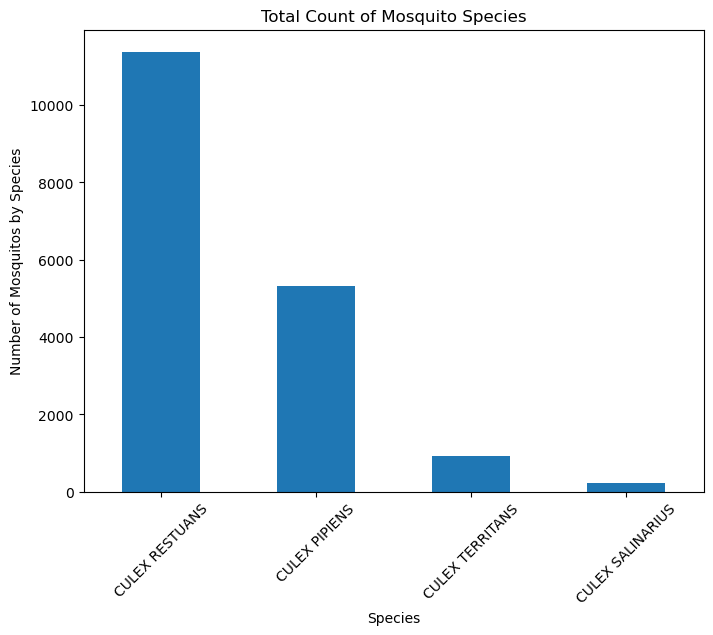

In [287]:
#Plotting a visualization for representation.
plt.figure()
mosquito_df['Species'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Number of Mosquitos by Species')
plt.title('Total Count of Mosquito Species')
plt.xticks(rotation=45)
plt.show()

### 'Species' Insights

- Culex Restuans has the highest number for mosquito species.
- Culex Restuans is the top 5 positive species for WNV.(Google)
- Culex Restuans is a disease vector for WNV.(Google)
- Culex Salinarius has the lowest number for mosquito species. 

In [114]:
#Gaining information on the column.
mosquito_df['WNV Present']

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
18490    positive
18491    positive
18492    positive
18493    positive
18494    positive
Name: WNV Present, Length: 18495, dtype: object

In [87]:
#Gaining information on number of negative and positive tests.
mosquito_df['WNV Present'].value_counts()

negative    14501
positive     3994
Name: WNV Present, dtype: int64

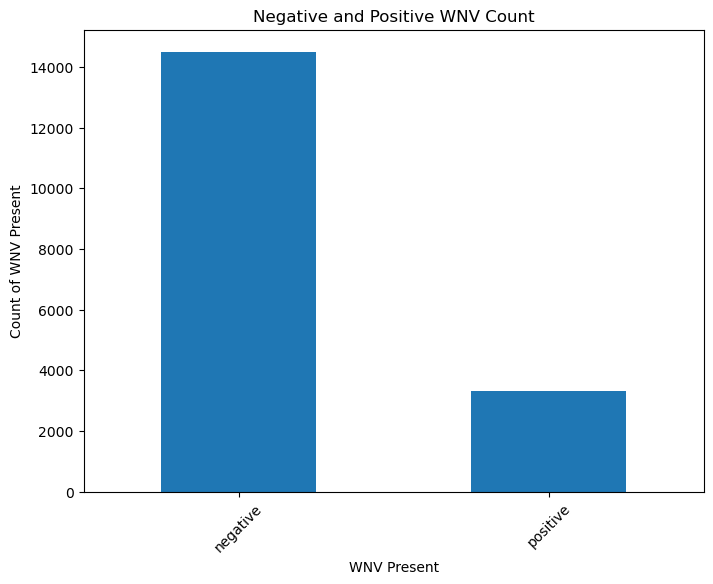

In [318]:
#Plotting a visualization for representation.
plt.figure()
mosquito_df['WNV Present'].value_counts().plot(kind='bar')
plt.xlabel('WNV Present')
plt.ylabel('Count of WNV Present')
plt.title('Negative and Positive WNV Count')
plt.xticks(rotation=45)
plt.show()

### 'WNV Present' Insights

- There are a lot more negative tests than positive tests. 
- Negative tests account for 78.4% of the count while positive tests account for 21.6% of the count.


### Next Step

Removing redudant columns from the data, and dealing with will null values appropiately. 

### 1.6 Removing Redudant Columns and Dealing with Null Values 

In [116]:
# .duplicated() returns a true-false array if a row is a duplicate.
mosquito_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18490    False
18491    False
18492    False
18493    False
18494     True
Length: 18495, dtype: bool

In [117]:
# Summing the resultant array to get the total number of duplicate rows.
mosquito_df.duplicated().sum()

658

In [118]:
#Removing duplicates from the rows.
mosquito_df.drop_duplicates(inplace=True)

In [119]:
#Duplicate row has been removed. 
# This is confirmed. 
mosquito_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18489    False
18490    False
18491    False
18492    False
18493    False
Length: 17837, dtype: bool

In [120]:
# To apply duplicates columnwise apply it to the transpose.
# Checks to see if the columns are indentical. 
mosquito_df.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

There were duplicated rows in the data frame. These are now removed. After checking rows, columns were checked for duplicated information. There does not appear to be any redudant columns. Moving forward with dealing with null values. 

### Dealing with Null Values in the Mosquito Dataset

- First step, get the sum of null values. 
- Second step, calculate the proportion of null values missing. 
- Third step, either delete or impute the values. 

In [121]:
#Getting the 
mosquito_df.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

In [122]:
#Calculating the proportion of nulls missing. 
mosquito_df.isna().mean()*100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

The missing values are in latitude and logitude. They both have 2,266 missing values. Threshold for removing dropping the columns were <5% and >50%. Both lattitude and longitude are at 12%. The next step is to impute using either the mean or median since dropping 12% may be too much data loss.

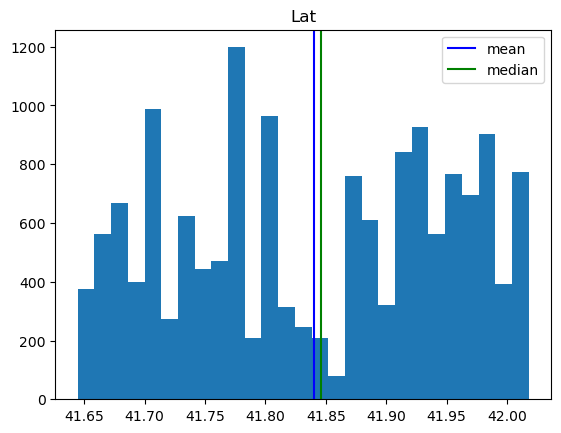

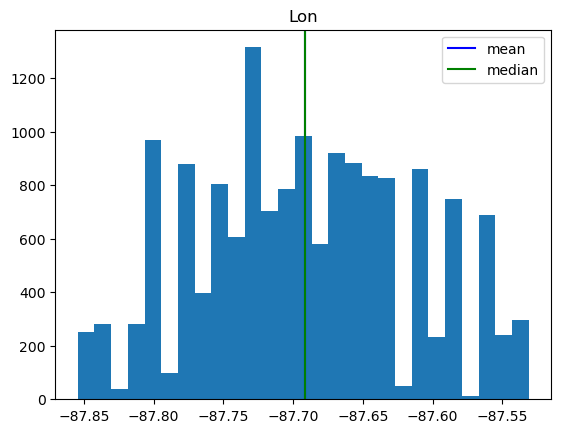

In [127]:
null_cols = mosquito_df.isna().sum()
cols_to_impute = null_cols[null_cols > 0].index


# Use for loop to loop over columns to impute and add histogram to each grid slot
for col in cols_to_impute:
    
    plt.figure()
    plt.hist(mosquito_df[col], bins=27)
    
    #vertical lines to show the median and mean
    plt.axvline(mosquito_df[col].mean(), c='blue', label='mean')
    plt.axvline(mosquito_df[col].median(), c='green', label='median')
    
    # legend
    plt.legend()
    
    # title
    plt.title(f'{col}')

    plt.show() 

Both visualizations for longitude and latitude can be filled in with the median. For 'Longitude' the median is close to the peak, and for latitude the mean is closer to the peak. Both sets of null values will be filled with the median of the respective columns as this is the safest option. 

In [128]:
#looping over the col names and using fillna to impute the values.
for col in cols_to_impute:
    mosquito_df[col] = mosquito_df[col].fillna(mosquito_df[col].median()) 
    

In [129]:
#Checking to see if there are null values. 
mosquito_df.isna().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

Null values have been dealt with appropitately. 

**In Summary**:

1. Data has been checked to see if it is using appropiate data types. 
2. (2) numerical, and (2) categorical columns were explored; understanding what data they stored and how they were distributed.
3. Columns with duplicate data were removed. 
4. Null values were dealth with appropiately using an impute. 

The next step is cleaning, data exploration and analysis, specifically our questions of interest-

- What is the relationship between mosquito number and date?
- What is the relationship between mosquito species and WNV prevalence? 
- What is the relationship between number of mosquitos caught and trap type?
- What is the relationship between block number and WNV prevalence?


### 2. Cleaning Data

In [137]:
#dropping week, address block, latitude, and longitude for EDA. 

mosquito_df2 = mosquito_df.drop(columns = ['Address Block','Lat','Lon','Week','Year'])

In [139]:
mosquito_df2.head()

,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species
0,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS
1,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS
2,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS
3,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS
4,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS


In [148]:
mosquito_df2['Mosquito number'].value_counts().sort_index()

1     4119
2     2242
3     1544
4     1080
5      895
6      706
7      593
8      513
9      407
10     356
11     347
12     317
13     293
14     238
15     217
16     222
17     193
18     172
19     146
20     135
21     170
22     112
23     139
24      98
25     110
26     125
27     123
28     114
29     121
30      75
31     115
32      89
33      82
34      67
35      65
36      79
37      80
38      60
39      64
40      46
41      61
42      48
43      70
44      67
45      72
46      85
47      90
48      58
49      46
50     571
Name: Mosquito number, dtype: int64

Data has been cleaned. Proceeding to answer questions of interest by dividing the data numerically and categorically by separating according to data type. 

In [246]:
mosquito_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Block            17837 non-null  int64         
 1   Trap             17837 non-null  object        
 2   Trap type        17837 non-null  object        
 3   Date             17837 non-null  datetime64[ns]
 4   Mosquito number  17837 non-null  int64         
 5   Mosquito ID      17837 non-null  object        
 6   WNV Present      17837 non-null  object        
 7   Species          17837 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.7+ MB


Date is an object in dataframe. Changing it to 'datetime' format as was done in previous 'dataframe.' 

### 2.1 Exploring the Relationship Between 'Mosquito number' and 'Date.'

Exploring the relationship between 'Mosquito number' and 'Date.'
- First, by separating the numerical columns from the categorical using data type. 
- Second using the tables presented to see what relationship there is between date and mosquito number. 
- Third using this information to create a visual (a scatter plot) 

In [303]:
#Reconverting 'Date' to datetime format
mosquito_df2['Date'] = pd.to_datetime(mosquito_df2['Date'])

In [311]:
#Separating 'Numerical from Categorical' and checking. 
numerical_df = mosquito_df2.select_dtypes(['int64','float64', 'datetime64'])

numerical_df.head()

,Block,Date,Mosquito number
0,100,2019-09-26 00:09:00,2
1,52,2019-09-26 00:09:00,1
2,58,2019-09-26 00:09:00,2
3,39,2019-09-26 00:09:00,1
4,131,2019-09-26 00:09:00,9


In [305]:
mosquito_df2['Date'] = pd.to_datetime(mosquito_df2['Date'])

In [306]:
numerical_df.tail()

,Block,Date,Mosquito number
18489,63,2013-08-29 00:08:00,3
18490,3,2016-09-09 00:09:00,4
18491,46,2007-08-24 00:08:00,19
18492,127,2016-07-27 00:07:00,34
18493,20,2017-08-17 00:08:00,50


In [314]:
# Date is missing from the describe.
numerical_df.describe()

,Block,Mosquito number
count,17837.000000,17837.000000
mean,52.864383,10.458822
std,36.318698,13.182843
min,1.000000,1.000000
25%,22.000000,2.000000
50%,50.000000,4.000000
75%,81.000000,13.000000
max,132.000000,50.000000


In [315]:
object_df = mosquito_df2.select_dtypes('object')
object_df.head()

,Trap,Trap type,Mosquito ID,WNV Present,Species
0,T910,GRAVID,Res,negative,CULEX RESTUANS
1,T114,GRAVID,Res,negative,CULEX RESTUANS
2,T028,GRAVID,Res,negative,CULEX RESTUANS
3,T228,GRAVID,Res,negative,CULEX RESTUANS
4,T209,GRAVID,Res,negative,CULEX RESTUANS


In [316]:
object_df = mosquito_df2.select_dtypes('object')
object_df.tail()

,Trap,Trap type,Mosquito ID,WNV Present,Species
18489,T155,GRAVID,Pip,positive,CULEX PIPIENS
18490,T043,GRAVID,Pip,positive,CULEX PIPIENS
18491,T003,GRAVID,Pip,positive,CULEX PIPIENS
18492,T115,GRAVID,Res,positive,CULEX RESTUANS
18493,T240B,SENTINEL,Res,positive,CULEX RESTUANS


In [317]:
object_df.describe()

,Trap,Trap type,Mosquito ID,WNV Present,Species
count,17837,17837,17837,17837,17837
unique,190,4,4,2,4
top,T002,GRAVID,Res,negative,CULEX RESTUANS
freq,406,17098,11387,14501,11387


**Proceeding to explore the realtionship between 'Mosquito number' and 'Date'**

In [253]:
#Value counts for 'Date'
mosquito_df2['Date'].value_counts().sort_index()

2007-05-29 00:05:00    16
2007-06-05 00:06:00    40
2007-06-26 04:06:06     9
2007-06-26 04:06:07     5
2007-06-26 04:06:56     6
                       ..
2019-08-29 00:08:00    68
2019-09-05 00:09:00    41
2019-09-12 00:09:00    59
2019-09-19 00:09:00    46
2019-09-26 00:09:00    42
Name: Date, Length: 298, dtype: int64

In [285]:
#Value counts for 'Mosquito number'
mosquito_df2['Mosquito number'].value_counts().sort_index()

1     4119
2     2242
3     1544
4     1080
5      895
6      706
7      593
8      513
9      407
10     356
11     347
12     317
13     293
14     238
15     217
16     222
17     193
18     172
19     146
20     135
21     170
22     112
23     139
24      98
25     110
26     125
27     123
28     114
29     121
30      75
31     115
32      89
33      82
34      67
35      65
36      79
37      80
38      60
39      64
40      46
41      61
42      48
43      70
44      67
45      72
46      85
47      90
48      58
49      46
50     571
Name: Mosquito number, dtype: int64

In [276]:
#Setting parameter for our two columns.
plt.rcParams['figure.figsize'] = (8.0, 6.0)

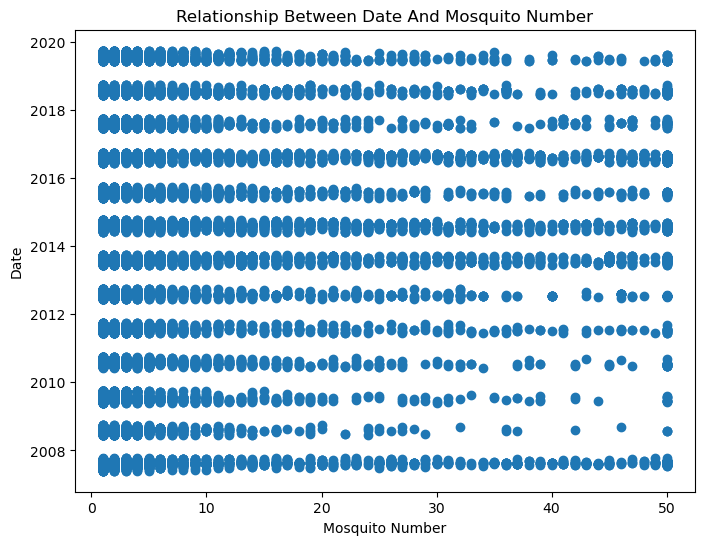

In [300]:
plt.figure()
plt.scatter(mosquito_df2['Mosquito number'], mosquito_df2['Date'])
plt.xlabel('Mosquito number'.title())
plt.ylabel('Date'.title())
plt.title('Relationship Between Date and Mosquito number'.title())
plt.show()

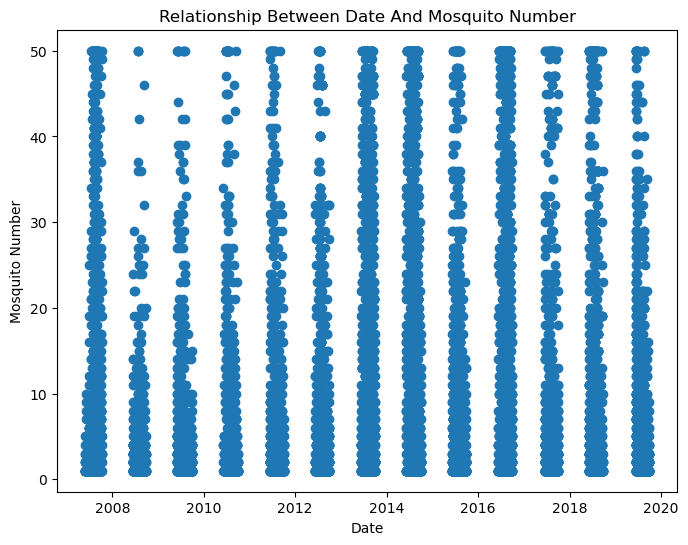

In [339]:
plt.figure()
plt.scatter(mosquito_df2['Date'], mosquito_df2['Mosquito number'])
plt.xlabel('Date'.title())
plt.ylabel('Mosquito number'.title())
plt.title('Relationship Between Date and Mosquito number'.title())
plt.show()

### 'Mosquito number' and 'Date' Observations

- There does not seem to be an effect on mosquito number and date.
- One particular interesting cluster is between (2009 - 2011) where there is less mosquito numbers between (30 - 50)
- Another observation was specifically looking at the time of of the date and comparing to mosquito number. 
    - It was observed that highest mosquito numbers were between 5:00am - 9:00am.
    - This could be due to the fact that Mosquitoes are most active during early morning hours before the sun has fully come up and the air temperature isn't as hot. Mosquitoes find daylight to be deadly, as direct daylight can dehydrate them
    
Moving forward with exploring the relationship between 'Mosquito Species' and 'WNV'prevalence.

### 2.2 Exploring the Relationship Between 'Mosquito Species' and 'WNV' Present

In [322]:
#Looking at WNV Present Column and Species
object_df.describe()

,Trap,Trap type,Mosquito ID,WNV Present,Species
count,17837,17837,17837,17837,17837
unique,190,4,4,2,4
top,T002,GRAVID,Res,negative,CULEX RESTUANS
freq,406,17098,11387,14501,11387


Using an bivariate eda approach to explore the two variables.

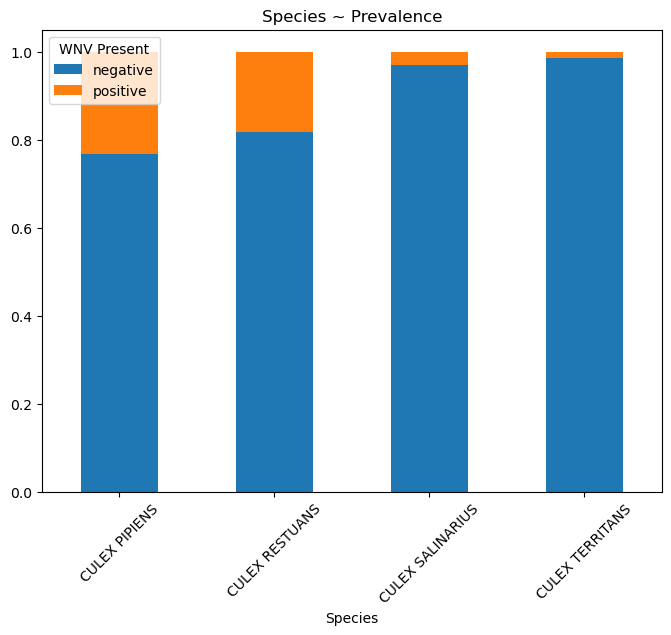

In [333]:
# Iterate over each categorical column except the first four.

for column in object_df.columns[4:]:

    pct_mosquito_df2 = object_df.groupby([column, 'WNV Present'])[column].count()/mosquito_df2.groupby(column)[column].count()

    pct_mosquito_df2.unstack().plot(kind='bar', stacked=True,title = f"{column} ~ Prevalence")
    
    plt.xticks(rotation=45)
    
    plt.show()

### 'Mosquito Species' and WNV Present' Observations

- The 'Mosquito Species' Culex Restuans has the highest count of mosquitos caught but not the highest percentage of WNV Present. 
- Culex Pipiens has the highest 'positive' percentage of WNV present.
- Culex Pipiens and Culex Restuans has the highest presence of WNV among them. 
- Culex Salinarius and Culex Territans have the highest 'negative' percentage of WNV present. 
- There is a relationship between 'Mosquito Species' and 'WNV Present.'

Moving forward with next question of interest, 
What is the relationship between number of mosquitos caught and trap type?

### 2.3 Exploring the Relationship Between 'Mosquito number' and 'Trap Type

In [348]:
#Gaining an understanding of total count for trap type.
mosquito_df2['Trap type'].value_counts()

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

Using using the bivariate EDA numerical approach.

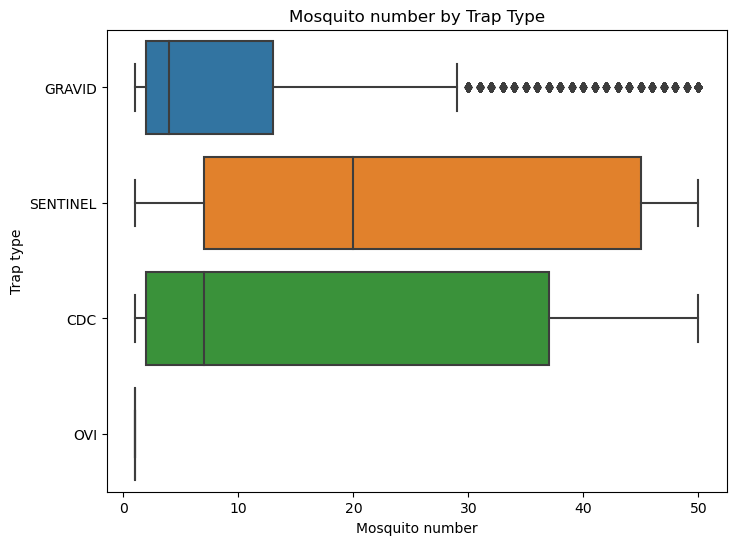

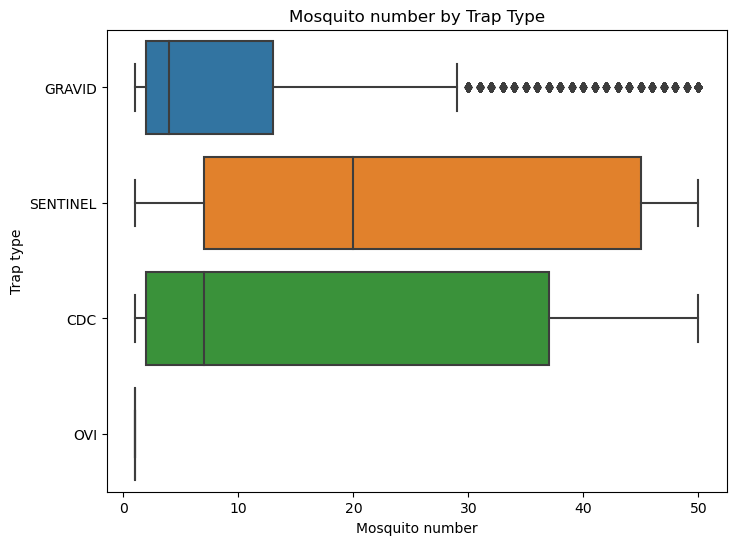

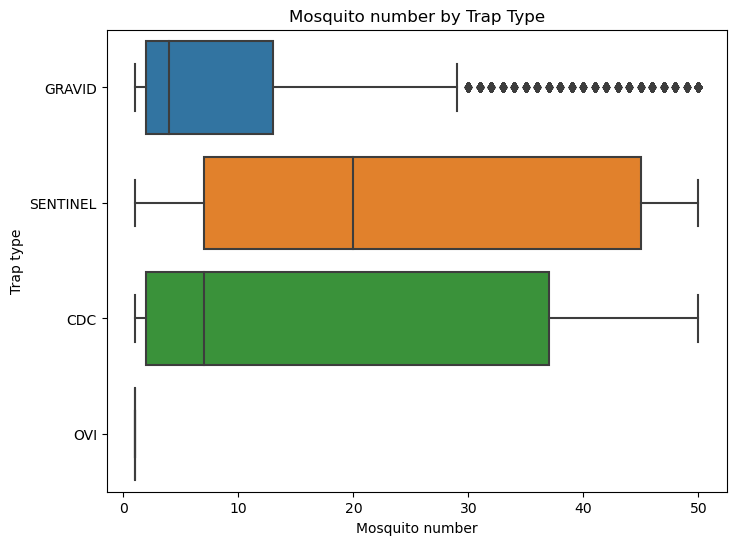

In [346]:
for col in numerical_df.columns:
    
    sns.boxplot(x = 'Mosquito number',y = 'Trap type',data = mosquito_df2)
    plt.title(f"{'Mosquito number'} by Trap Type")
    plt.show()

### Mosquito number and Trap type Observations

- Gravid is overwhemlingly used as the trap of choice. 
- OVI is used the least. Only once to be specific.  
- The Gravid trap is generally used for mosquito numbers less than 50.
- The Sentinel trap is used for mosquito numbers at 50 or more. 

Moving on to last exploration, relationship between WNV Present and Trap type 

### 2.4 Exploring Mosquito Block

In [368]:
mosquito_df2['Block'].value_counts()

100    1677
22      715
58      636
70      629
52      577
       ... 
129       5
29        2
112       2
88        2
54        1
Name: Block, Length: 87, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

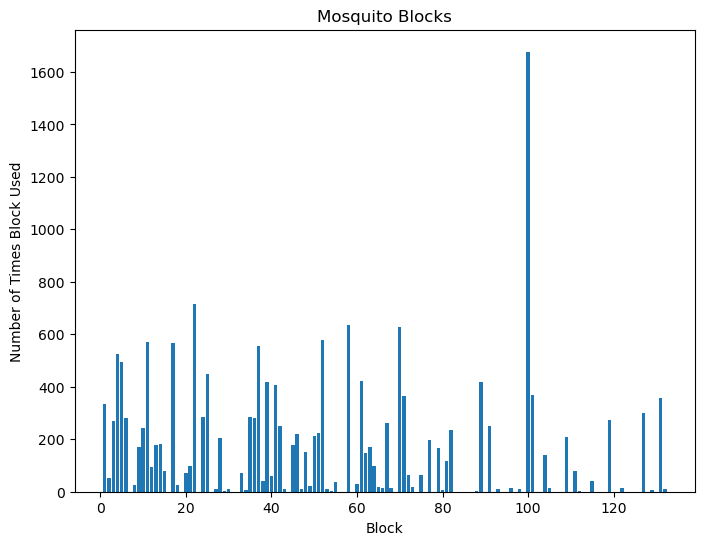

In [371]:
plt.figure()
plt.bar(mosquito_df2['Block'].value_counts().index, 
         mosquito_df2['Block'].value_counts().values,)

plt.title('Mosquito Blocks')
plt.xlabel('Block')
plt.ylabel('Number of Times Block Used')
plt.show

### Mosquito Block Observations

- There were only 87 block numbers used. 
- Of the 87 block numbers used, block 100 was the peak with the most use. 
- Blocks 0 to 80 was used more consistently than those over 80.

### 3. Conclusion/Summary

Listed are the initial analysis of the WNV presence in Chicago

- There are a lot more negative tests than positive tests. 
- Negative tests account for 78.4% of the count while positive tests account for 21.6% of the count.
- There does not seem to be an effect on mosquito number and date.
- One particular interesting cluster is between (2009 - 2011) where there is less mosquito numbers between (30 - 50)
- Another observation was specifically looking at the time of of the date and comparing to mosquito number. 
- It was observed that highest mosquito numbers were between 5:00am - 9:00am.
    - This could be due to the fact that Mosquitoes are most active during early morning hours before the sun has fully come up and the air temperature isn't as hot. Mosquitoes find daylight to be deadly, as direct daylight can dehydrate them
- The 'Mosquito Species' Culex Restuans has the highest count of mosquitos caught but not the highest percentage of WNV Present. 
- Culex Pipiens has the highest 'positive' percentage of WNV present.
- Culex Pipiens and Culex Restuans has the highest presence of WNV among them. 
- Culex Salinarius and Culex Territans have the highest 'negative' percentage of WNV present. 
- There is a relationship between 'Mosquito Species' and 'WNV Present.'
- Gravid is overwhemlingly used as the trap of choice. 
- OVI is used the least. Only once to be specific.  
- The Gravid trap is generally used for mosquito numbers less than 50.
- The Sentinel trap is used for mosquito numbers at 50 or more. 
- There were only 87 block numbers used. 
- Of the 87 block numbers used, block 100 was the peak with the most use. 
- Blocks 0 to 80 was used more consistently than those over 80.